# Visualizations with BioRemPP

This notebook demonstrates the use of the BioRemPP library for analyzing bioremediation potential and the subsequent visualization of the results.

---

<a id='1'></a>
## 1. Installation and Environment Setup

In this section, we prepare the execution environment by installing the BioRemPP library and verifying that the installation was successful.

<a id='1.1'></a>
### 1.1. Package Installation

BioRemPP is distributed through the Python Package Index (PyPI). For this demonstration, we use the test PyPI repository to access the latest development version.

In [1]:
# Install BioRemPP from the test PyPI repository
# The --extra-index-url flag ensures access to all necessary dependencies
!pip install --index-url https://test.pypi.org/simple/ --extra-index-url https://pypi.org/simple/ biorempp==0.7.0.post1.dev2

Looking in indexes: https://test.pypi.org/simple/, https://pypi.org/simple/


<a id='1.2'></a>
### 1.2. Installation Verification

After installation, we verify the package's accessibility and version information to ensure proper setup.

In [2]:
# Verify BioRemPP installation and display version information
import biorempp
print(f"BioRemPP version: {biorempp.__version__}")
print(f"Installation path: {biorempp.__file__}")
print("✅ Installation verified successfully")

BioRemPP version: 0.7.0.post1.dev2
Installation path: /usr/local/lib/python3.11/dist-packages/biorempp/__init__.py
✅ Installation verified successfully


---

<a id='2'></a>
## 2. Sample Data Preparation

Here, we detail the data format expected by BioRemPP and load an example dataset for the demonstration.

<a id='2.1'></a>
### 2.1. Input Data Requirements

BioRemPP accepts input data in a FASTA-like header format with KO (KEGG Orthology) identifiers. For demonstration purposes, we first present a **mock example** that illustrates the expected structure:

```
>SampleX1
K00031
K00032
K00090
K00042
K00052
>SampleX2
K00031
K00032
K00090
K00042
K00052
```

This simplified structure shows how each sample begins with a header (`>SampleX`) followed by KO identifiers.

<a id='2.2'></a>
### 2.2. Demonstration Data

For the actual demonstration, BioRemPP uses **9 representative samples** drawn from three principal groups relevant to bioremediation research: **Bacteria**, **Fungi**, and **Microalgae/Cyanobacteria**. These organisms were selected based on the genera reported in the article:

*Bacteria, Fungi and Microalgae for the Bioremediation of Marine Sediments Contaminated by Petroleum Hydrocarbons in the Omics Era*
*Microorganisms 2021, 9, 1695.* [https://doi.org/10.3390/microorganisms9081695](https://doi.org/10.3390/microorganisms9081695)

<a id='2.3'></a>
### 2.3. Selected Organisms

The dataset includes **three representatives from each group**, totaling 9 organisms:

* **Bacteria**
    * *Acinetobacter baumannii* — `acb`
    * *Enterobacter asburiae* — `eau`
    * *Pseudomonas aeruginosa* — `pae`
* **Fungi**
    * *Aspergillus nidulans* — `ani`
    * *Fusarium graminearum* — `fgr`
    * *Cryptococcus gattii* — `cgi`
* **Microalgae/Cyanobacteria**
    * *Chlorella variabilis* — `cvr`
    * *Nannochloropsis gaditana* — `ngd`
    * *Synechocystis sp.* — `syn`

These organisms provide a biologically meaningful subset for testing, reflecting taxa that are actively studied in the context of petroleum hydrocarbon bioremediation.

<a id='2.4'></a>
### 2.4. Importing from the Repository

The demonstration dataset is made directly available in the BioRemPP repository. Users can import it from:

```
[https://raw.githubusercontent.com/DougFelipe/biorempp/main/src/biorempp/data/sample_data.txt](https://raw.githubusercontent.com/DougFelipe/biorempp/main/src/biorempp/data/sample_data.txt)
```

This allows users to load the same **9 representative samples** described above directly from the repository, ensuring reproducibility and consistency with the published demonstration.

In [3]:
import requests
from pathlib import Path

# Raw URL of the file on GitHub
url = "https://raw.githubusercontent.com/DougFelipe/biorempp/main/src/biorempp/data/sample_data.txt"

# Output path
outfile = Path("sample_data.txt")

# Download the file
response = requests.get(url, timeout=30)
response.raise_for_status()  # Raise an error if the request failed

# Save to disk
outfile.write_text(response.text, encoding="utf-8")

print(f"Saved to: {outfile.resolve()}")
print("\nFirst 15 lines:\n")
print("\n".join(response.text.splitlines()[:15]))

Saved to: /content/sample_data.txt

First 15 lines:

>Acinetobacter Baumanii - acb
K01704
K10773
K14682
K07462
K03643
K00799
K03799
K00766
K00564
K01735
K03774
K03781
K01652
K03043


---

<a id='3'></a>
## 3. Comprehensive Multi-Database Analysis

With the data prepared, we execute the main BioRemPP analysis.

<a id='3.1'></a>
### 3.1. All-Database Integration

Comprehensive analysis utilizing all available databases provides the most complete assessment of bioremediation potential. This approach is recommended for systematic screening and comparative studies.

In [4]:
# Perform comprehensive analysis across all databases
# This provides the most complete bioremediation potential assessment
!biorempp --input sample_data.txt --all-database


[BIOREMPP] Processing with ALL Databases

[LOAD] Loading input data...        OK 23,653 KO identifiers loaded

[PROCESS] Processing databases [1/4]:
   [DB] BioRemPP Database...      OK 7,613 matches -> BioRemPP_Results.txt

[PROCESS] Processing databases [2/4]:
   [DB] HAdeg Database...      OK 1,737 matches -> HADEG_Results.txt

[PROCESS] Processing databases [3/4]:
   [DB] KEGG Database...      OK 731 matches -> KEGG_Results.txt

[PROCESS] Processing databases [4/4]:
   [DB] ToxCSM Database...      OK 7,624 matches -> ToxCSM.txt

[SUCCESS] All databases processed successfully!
   [RESULTS] Total results: 17,705 matches across 4 databases
   [OUTPUT] Location: outputs/results_tables/
   [TIME] Total time: 1.4 seconds



---

<a id='4'></a>
## 4. Results Analysis and Visualization

After running BioRemPP, the next step is to process and visualize the output data to extract insights. The generated `/content/outputs/results_tables` fold contains the analysis all results tables.

<a id='4.1'></a>
### 4.1. KO Count per Sample

First, we process the results file to count the number of unique KO (KEGG Orthology) identifiers for each sample. This count is an indicator of the functional diversity related to bioremediation potential.

In [5]:
# ==============================================================================
# Data Processing: Count Unique KOs per Sample
# ==============================================================================

# ------------------------------------------------------------------------------
# 1. SETUP: Import Libraries
# ------------------------------------------------------------------------------
# Import the pandas library, which is essential for data manipulation and analysis in Python.
import pandas as pd


# ------------------------------------------------------------------------------
# 2. DATA LOADING: Read the Raw Results File
# ------------------------------------------------------------------------------
# Load the results file generated by the analysis tool (e.g., BioRemPP).
# 'sep=';'' specifies that the columns in the file are separated by semicolons.
df = pd.read_csv('/content/outputs/results_tables/BioRemPP_Results.txt', sep=';')


# ------------------------------------------------------------------------------
# 3. DATA SUBSETTING: Isolate Relevant Columns
# ------------------------------------------------------------------------------
# Create a new, smaller DataFrame containing only the 'sample' and 'ko' columns.
# This makes the subsequent processing faster and the code easier to read.
df_subset = df[['sample', 'ko']]


# ------------------------------------------------------------------------------
# 4. CORE LOGIC: Count Unique KOs for Each Sample
# ------------------------------------------------------------------------------
# This is a multi-step chain of operations to calculate the desired counts:
#
# 1. .drop_duplicates(): Removes rows where the combination of 'sample' and 'ko' is identical.
#    This is crucial to ensure we only count each unique KO once per sample.
# 2. .groupby('sample'): Groups the DataFrame by the sample names. All subsequent
#    operations will be performed independently on each sample's data.
# 3. ['ko'].nunique(): For each sample group, it selects the 'ko' column and counts
#    the number of unique values (nunique).
# 4. .reset_index(): Converts the grouped output back into a standard DataFrame,
#    turning the 'sample' index back into a column.
ko_counts = df_subset.drop_duplicates().groupby('sample')['ko'].nunique().reset_index()


# ------------------------------------------------------------------------------
# 5. DATA CLEANUP: Refine and Sort the Final DataFrame
# ------------------------------------------------------------------------------
# Rename the columns for better clarity. The default count column is renamed to 'unique_ko_count'.
ko_counts.columns = ['sample', 'unique_ko_count']

# Sort the DataFrame by the 'unique_ko_count' column in descending order (highest count first).
ko_counts = ko_counts.sort_values(by='unique_ko_count', ascending=False)


# ------------------------------------------------------------------------------
# 6. OUTPUT: Display and Save the Results
# ------------------------------------------------------------------------------
# Display the final, processed table in the console.
print("Unique KO counts per sample:")
print(ko_counts)

# Save the resulting DataFrame to a new CSV file named 'ko_counts_by_sample.csv'.
# 'index=False' prevents pandas from writing the DataFrame index as a column in the file.
# This file can be easily used for subsequent visualizations.
ko_counts.to_csv('ko_counts_by_sample.csv', index=False)

Unique KO counts per sample:
                           sample  unique_ko_count
7    Pseudomonas aeruginosa - pae              143
5      Fusarium graminearum - fgr              129
1      Aspergillus nidulans - ani              115
2      Chlorella variabilis - cvr              102
0    Acinetobacter Baumanii - acb               84
4     Enterobacter asburiae - eau               79
8                Synechocystis sp               50
3       Cryptococcus gattii - cgi               41
6  Nannochloropsis gaditana - ngd               27


<a id='4.2'></a>
### 4.1.1 Horizontal Bar Chart

The first visualization is a horizontal bar chart. This type of chart is ideal for comparing the unique KO counts among different samples, ordering them from highest to lowest. It allows for a quick identification of the samples with the greatest genetic potential for bioremediation.

In [6]:
# ==============================================================================
# Horizontal Bar Chart for Unique KO Counts
# ==============================================================================

# ------------------------------------------------------------------------------
# 1. SETUP: Import Libraries
# ------------------------------------------------------------------------------
# Import the pandas library for data manipulation and analysis.
import pandas as pd
# Import the plotly.express library for creating high-level interactive charts.
import plotly.express as px


# ------------------------------------------------------------------------------
# 2. DATA LOADING: Read Data from CSV
# ------------------------------------------------------------------------------
# Load the pre-processed data from the 'ko_counts_by_sample.csv' file.
# This file is expected to have at least two columns: 'sample' and 'unique_ko_count'.
df_sorted = pd.read_csv('ko_counts_by_sample.csv')


# ------------------------------------------------------------------------------
# 3. CHART CREATION: Generate the Horizontal Bar Chart
# ------------------------------------------------------------------------------
# Create a bar chart figure using plotly.express.
fig_bar = px.bar(
    df_sorted,                           # The DataFrame containing the data.
    x='unique_ko_count',                 # Use the 'unique_ko_count' column for the x-axis (the length of the bars).
    y='sample',                          # Use the 'sample' column for the y-axis (the categories).
    orientation='h',                     # CRITICAL: Set the orientation to 'h' to make the bars horizontal.
    text='unique_ko_count',              # Add the value from 'unique_ko_count' as a text label on each bar.
    title='Unique KO Count per Sample',  # The main title of the chart.
    labels={'sample': 'Sample', 'unique_ko_count': 'No. of Unique KOs'}, # Custom labels for the axes.
    color_discrete_sequence=['mediumseagreen'] # Set a single, custom color for all bars.
)


# ------------------------------------------------------------------------------
# 4. TRACE ADJUSTMENT: Fine-tune Bar Text
# ------------------------------------------------------------------------------
# Update the properties of the traces (the bars) in the figure.
# This moves the text labels to be just outside the end of each bar for better readability.
fig_bar.update_traces(textposition='outside')


# ------------------------------------------------------------------------------
# 5. LAYOUT CONFIGURATION: Customize the Chart's Appearance
# ------------------------------------------------------------------------------
# Update the layout of the figure to refine its style.
fig_bar.update_layout(
    # Customize the y-axis.
    # 'categoryorder='total ascending'' automatically sorts the bars from shortest to longest.
    yaxis=dict(categoryorder='total ascending'),
    plot_bgcolor='white',                # Set the plot background to white for a clean look.
    # Customize the x-axis.
    xaxis=dict(gridcolor='lightgray')    # Set the color of the vertical grid lines.
)


# ------------------------------------------------------------------------------
# 6. DISPLAY: Show the Final Plot
# ------------------------------------------------------------------------------
# Render and display the interactive figure.
fig_bar.show()

<a id='4.3'></a>
### 4.3. Vertical Boxplot with Jitter

To understand the overall data distribution, we use a boxplot. This chart summarizes the distribution of unique KO counts, showing the median, quartiles, and outliers. We add "jitter" (a small random variation in position) to the individual data points to avoid overlap, allowing each sample to be seen clearly. The rank of each sample is displayed on hover.

In [7]:
# ==============================================================================
# Vertical Boxplot with Jittered Scatter Points
# ==============================================================================

# ------------------------------------------------------------------------------
# 1. SETUP: Import Libraries
# ------------------------------------------------------------------------------
# Import the pandas library for data manipulation.
import pandas as pd
# Import plotly.graph_objects for creating custom, multi-layered figures.
import plotly.graph_objects as go
# Import numpy for numerical operations, specifically for generating random jitter.
import numpy as np


# ------------------------------------------------------------------------------
# 2. DATA LOADING & PREPARATION
# ------------------------------------------------------------------------------
# Load the data from the specified CSV file into a pandas DataFrame.
df_box = pd.read_csv('ko_counts_by_sample.csv')
# Ensure the 'sample' column is treated as a string data type.
df_box['sample'] = df_box['sample'].astype(str)

# --- Add a ranking column ---
# Create a 'rank' column based on 'unique_ko_count'.
# 'ascending=False' means higher counts get lower rank numbers (e.g., rank 1).
# 'method='min'' handles ties by giving them the same rank.
# '.astype(int)' converts the rank from a float to an integer.
df_box['rank'] = df_box['unique_ko_count'].rank(method='min', ascending=False).astype(int)


# ------------------------------------------------------------------------------
# 3. JITTER CALCULATION: Prepare points for scatter plot
# ------------------------------------------------------------------------------
# Set a seed for numpy's random number generator to ensure the jitter is the same every time the code runs.
np.random.seed(42)
# Define the intensity of the horizontal spread (jitter).
jitter_strength = 0.03
# Generate random numbers from a normal distribution for each data point.
x_jitter = np.random.normal(loc=0, scale=jitter_strength, size=len(df_box))
# Create the final x-coordinates for the scatter points by adding the jitter to a central position (x=1).
x_points = 1 + x_jitter


# ------------------------------------------------------------------------------
# 4. FIGURE CREATION: Initialize and build the plot
# ------------------------------------------------------------------------------
# Create an empty figure object to which we will add traces (layers).
fig_box = go.Figure()

# --- Add the Boxplot trace (the first layer) ---
fig_box.add_trace(go.Box(
    y=df_box['unique_ko_count'],     # The data for the y-axis.
    x=[1] * len(df_box),             # Place the boxplot at a fixed horizontal position (x=1).
    name='',                         # No name needed in the legend for this trace.
    boxpoints=False,                 # Do not show the default data points on the boxplot itself.
                                     # We use a separate scatter trace for custom points.
    marker_color='mediumseagreen',   # Set the color of the boxplot.
    opacity=0.9,                     # Set the transparency.
    line=dict(width=1.2),            # Set the width of the boxplot's outline.
    width=0.15                       # Make the boxplot itself narrow.
))

# --- Add the Scatter trace with jitter (the second layer) ---
fig_box.add_trace(go.Scatter(
    x=x_points,                      # Use the calculated jittered x-positions.
    y=df_box['unique_ko_count'],     # Use the original y-values.
    mode='markers',                  # Ensure this trace is rendered as points.
    # Define a custom template for the text that appears on hover.
    hovertemplate=(
        "<b>Sample:</b> %{customdata[0]}<br>"
        "<b>Unique KOs:</b> %{y}<br>"
        "<b>Rank:</b> %{customdata[1]}<extra></extra>" # <extra></extra> hides the trace name.
    ),
    # Pass the 'sample' and 'rank' columns as custom data for the hover template.
    customdata=df_box[['sample', 'rank']],
    # Style the markers (the points).
    marker=dict(color='black', size=6, line=dict(width=1, color='white')),
    showlegend=False                 # Hide this trace from the legend.
))


# ------------------------------------------------------------------------------
# 5. LAYOUT CONFIGURATION: Customize the figure's appearance
# ------------------------------------------------------------------------------
fig_box.update_layout(
    title='Vertical Boxplot of Unique KO Counts per Sample', # Main title for the chart.
    width=500,                       # Figure width in pixels.
    height=700,                      # Figure height in pixels.
    # Customize the x-axis.
    xaxis=dict(
        showticklabels=False,        # Hide tick labels (e.g., '1').
        showgrid=False,              # Hide vertical grid lines.
        zeroline=False,              # Hide the zero line.
        range=[0.9, 1.1]             # Set a narrow range to keep the plot centered.
    ),
    # Customize the y-axis.
    yaxis=dict(
        title='Number of Unique KOs per Sample', # Title for the y-axis.
        showgrid=True,               # Show horizontal grid lines.
        gridcolor='lightgray'        # Set the color of the grid lines.
    ),
    plot_bgcolor='white',            # Set the plot background to white.
    # Adjust the margins around the plot.
    margin=dict(l=60, r=40, t=60, b=40),
    showlegend=False                 # Hide the entire legend.
)


# ------------------------------------------------------------------------------
# 6. DISPLAY: Show the Final Plot
# ------------------------------------------------------------------------------
# Render and display the interactive figure.
fig_box.show()

<a id='4.4'></a>
### 4.4. 100% Stacked Bar Chart

The following visualization is a 100% stacked bar chart. This chart represents the proportional contribution of each sample to the total number of unique KOs found across the entire dataset.

Each colored segment corresponds to a sample, and its size indicates the percentage of KOs it represents relative to the total. This allows us to quickly assess which samples are the most significant in terms of genetic diversity within the analyzed context.

In [8]:
# ==============================================================================
# 100% Stacked Bar Chart of Proportional KO Counts
# ==============================================================================

# ------------------------------------------------------------------------------
# 1. SETUP: Import Libraries
# ------------------------------------------------------------------------------
# Import the pandas library for data manipulation and analysis.
import pandas as pd
# Import the plotly.express library for creating interactive visualizations.
import plotly.express as px


# ------------------------------------------------------------------------------
# 2. DATA LOADING: Read Data from CSV
# ------------------------------------------------------------------------------
# Define the path to the input CSV file.
file_path = '/content/ko_counts_by_sample.csv'
# Read the data from the CSV file into a pandas DataFrame.
df = pd.read_csv(file_path)


# ------------------------------------------------------------------------------
# 3. DATA PREPARATION: Create a Helper Column
# ------------------------------------------------------------------------------
# Add a new column named 'total' and assign the same string value to all rows.
# This is a technique to group all data into a single bar on the x-axis,
# which is necessary for creating one stacked bar.
df['total'] = 'Total Unique KOs'


# ------------------------------------------------------------------------------
# 4. CHART CREATION: Generate the Bar Chart
# ------------------------------------------------------------------------------
# Create a bar chart figure using plotly.express.
fig = px.bar(
    df,                                  # The DataFrame containing the data.
    x='total',                           # Use the helper column for the x-axis.
    y='unique_ko_count',                 # The values to be stacked on the y-axis.
    color='sample',                      # Assign a different color to each 'sample'.
    title='Proportional Contribution of Each Sample to Total Unique KOs', # Chart title.
    labels={'unique_ko_count': 'Percentage of Unique KOs'}, # Custom label for the y-axis.
    text_auto='.2f',                     # Automatically add text labels, formatted to 2 decimal places.
    height=500                           # Set the height of the figure in pixels.
)


# ------------------------------------------------------------------------------
# 5. LAYOUT CONFIGURATION: Customize the Chart's Appearance
# ------------------------------------------------------------------------------
# Update the layout of the figure for a 100% stacked bar chart style.
fig.update_layout(
    barmode='stack',                     # Ensure the bars are stacked on top of each other.
    barnorm='percent',                   # CRITICAL: Normalize the values in each bar to sum to 100%.
    xaxis_title=None,                    # Remove the title from the x-axis.
    xaxis=dict(showticklabels=False),    # Hide the tick labels on the x-axis (e.g., 'Total Unique KOs').
    plot_bgcolor='white',                # Set the plot background to white for a clean look.
    yaxis=dict(gridcolor='lightgray'),   # Set the y-axis grid lines to a light gray color.
    legend_title_text='Sample'           # Add a title to the legend.
)


# ------------------------------------------------------------------------------
# 6. TRACE ADJUSTMENT: Fine-tune Bar and Text Properties
# ------------------------------------------------------------------------------
# Update the properties of the traces (the actual bars) in the figure.
fig.update_traces(
    textangle=0,                         # Keep the text labels horizontal.
    textposition='inside',               # Position the text labels inside their bar segments.
    insidetextanchor='middle',           # Center the text labels within their segments.
    width=0.2                            # Set the width of the bar to make it thinner (e.g., 20% of available space).
)


# ------------------------------------------------------------------------------
# 7. DISPLAY: Show the Final Plot
# ------------------------------------------------------------------------------
# Render and display the interactive figure.
fig.show()

In [9]:
# ==============================================================================
# ALTERNATIVE APPROACH: Interactive Plot using the Panel Library
# ==============================================================================
# This script demonstrates an alternative method for creating interactive plots
# in Colab using the Panel library. Panel simplifies the connection between
# widgets (like dropdowns) and plots.
# ==============================================================================

# ------------------------------------------------------------------------------
# 1. SETUP: Install and Import Libraries
# ------------------------------------------------------------------------------
# Install the 'panel' library. It works well with plotting libraries like Plotly.
!pip install panel -q

import pandas as pd
import plotly.graph_objects as go
import panel as pn

# Load the panel extension to enable rendering in the notebook.
pn.extension('plotly')

# ------------------------------------------------------------------------------
# 2. DATA LOADING AND PREPARATION
# ------------------------------------------------------------------------------
try:
    # Define the path to the KEGG results file.
    file_path = '/content/outputs/results_tables/KEGG_Results.txt'

    # Load the data from the file using a semicolon separator.
    print(f"Loading data from '{file_path}'...")
    df = pd.read_csv(file_path, sep=';')

    # Drop rows where key columns have missing values to ensure data integrity.
    df.dropna(subset=['sample', 'pathname', 'ko'], inplace=True)

    # Get a sorted list of unique samples to populate the dropdown menu.
    unique_samples = sorted(df['sample'].unique())

    print("✅ Data loaded and prepared successfully!")

# ------------------------------------------------------------------------------
# 3. PLOTTING FUNCTION: Defines how the chart is created
# ------------------------------------------------------------------------------
    # This function takes a sample name and returns a complete Plotly figure.
    # Panel will automatically create a widget for the 'selected_sample' argument.
    def create_plot(selected_sample):
        """
        Filters data for a given sample, calculates KO counts, and returns a
        Plotly figure object.

        Args:
            selected_sample (str): The sample name.

        Returns:
            go.Figure: The Plotly bar chart.
        """
        # Filter the DataFrame to include only data for the selected sample.
        sample_df = df[df['sample'] == selected_sample]

        # Group by 'pathname' and count the number of unique 'ko' identifiers.
        pathway_counts = sample_df.groupby('pathname')['ko'].nunique().reset_index()
        pathway_counts.columns = ['pathname', 'unique_ko_count']

        # Sort the results for better visualization.
        pathway_counts = pathway_counts.sort_values(by='unique_ko_count', ascending=True)

        # Create the Plotly Figure.
        fig = go.Figure()
        fig.add_bar(
            x=pathway_counts['unique_ko_count'],
            y=pathway_counts['pathname'],
            orientation='h',
            text=pathway_counts['unique_ko_count'],
            textposition='outside',
            marker_color='darkcyan'
        )

        # Customize the Layout.
        fig.update_layout(
            title=f'<b>Unique KO Count by Pathway for:</b><br>{selected_sample}',
            title_x=0.5,
            xaxis_title='Unique KO Count',
            yaxis_title='Pathway Name',
            plot_bgcolor='white',
            height=max(600, len(pathway_counts) * 25),
            margin=dict(l=350, r=50, t=100, b=50)
        )

        # Return the complete figure.
        return fig

# ------------------------------------------------------------------------------
# 4. INTERACTIVITY: Create and Display the Interactive Panel
# ------------------------------------------------------------------------------
    # Use pn.interact to link the function to a widget.
    # Panel inspects the function's arguments and automatically creates a
    # dropdown for 'selected_sample' because we provide a list of options.
    interactive_plot = pn.interact(create_plot, selected_sample=unique_samples)

    # Display the interactive components.
    # We display the title and the interactive plot in a clean layout.
    print("\n--- Interactive Pathway Explorer (Panel Version) ---")
    display(pn.Column(
        "### Select a sample from the dropdown below to update the chart:",
        interactive_plot
    ))

# ------------------------------------------------------------------------------
# 5. ERROR HANDLING
# ------------------------------------------------------------------------------
except FileNotFoundError:
    print(f"❌ ERROR: File not found at '{file_path}'. Please verify the path.")
except KeyError as e:
    print(f"❌ ERROR: A required column was not found: {e}. Please check the file's column names.")
except Exception as e:
    print(f"❌ An unexpected error occurred: {e}")



Loading data from '/content/outputs/results_tables/KEGG_Results.txt'...
✅ Data loaded and prepared successfully!

--- Interactive Pathway Explorer (Panel Version) ---


Column
    [0] Markdown(str)
    [1] Column
        [0] Column
            [0] Select(name='selected_sample', options=['Acinetobacter Baumanii -...], value='Acinetobacter B...)
        [1] Row
            [0] Plotly(Figure, name='interactive00120')

In [10]:
# ==============================================================================
# ALTERNATIVE APPROACH: Interactive Plot using the Panel Library
# ==============================================================================
# This script demonstrates an alternative method for creating interactive plots
# in Colab using the Panel library. Panel simplifies the connection between
# widgets (like dropdowns) and plots.
# ==============================================================================

# ------------------------------------------------------------------------------
# 1. SETUP: Install and Import Libraries
# ------------------------------------------------------------------------------
# Install the 'panel' library. It works well with plotting libraries like Plotly.
!pip install panel -q

import pandas as pd
import plotly.graph_objects as go
import panel as pn

# Load the panel extension to enable rendering in the notebook.
pn.extension('plotly')

# ------------------------------------------------------------------------------
# 2. DATA LOADING AND PREPARATION
# ------------------------------------------------------------------------------
try:
    # Define the path to the KEGG results file.
    file_path = '/content/outputs/results_tables/KEGG_Results.txt'

    # Load the data from the file using a semicolon separator.
    print(f"Loading data from '{file_path}'...")
    df = pd.read_csv(file_path, sep=';')

    # Drop rows where key columns have missing values to ensure data integrity.
    df.dropna(subset=['sample', 'pathname', 'ko'], inplace=True)

    # Get a sorted list of unique pathways to populate the dropdown menu.
    unique_pathways = sorted(df['pathname'].unique())

    print("✅ Data loaded and prepared successfully!")

# ------------------------------------------------------------------------------
# 3. PLOTTING FUNCTION: Defines how the chart is created
# ------------------------------------------------------------------------------
    # This function takes a pathway name and returns a complete Plotly figure.
    # Panel will automatically create a widget for the 'selected_pathway' argument.
    def create_plot(selected_pathway):
        """
        Filters data for a given pathway, calculates KO counts per sample,
        and returns a Plotly figure object.

        Args:
            selected_pathway (str): The pathway name.

        Returns:
            go.Figure: The Plotly bar chart.
        """
        # Filter the DataFrame to include only data for the selected pathway.
        pathway_df = df[df['pathname'] == selected_pathway]

        # Group by 'sample' and count the number of unique 'ko' identifiers.
        sample_counts = pathway_df.groupby('sample')['ko'].nunique().reset_index()
        sample_counts.columns = ['sample', 'unique_ko_count']

        # Sort the results for better visualization.
        sample_counts = sample_counts.sort_values(by='unique_ko_count', ascending=False)

        # Create the Plotly Figure.
        fig = go.Figure()
        fig.add_bar(
            x=sample_counts['sample'],
            y=sample_counts['unique_ko_count'],
            text=sample_counts['unique_ko_count'],
            textposition='outside',
            marker_color='darkcyan'
        )

        # Customize the Layout.
        fig.update_layout(
            title=f'<b>Unique KO Count per Sample for Pathway:</b><br>{selected_pathway}',
            title_x=0.5,
            xaxis_title='Sample',
            yaxis_title='Unique KO Count',
            plot_bgcolor='white',
            height=600,
            xaxis_tickangle=-45 # Angle the x-axis labels to prevent overlap
        )

        # Return the complete figure.
        return fig

# ------------------------------------------------------------------------------
# 4. INTERACTIVITY: Create and Display the Interactive Panel
# ------------------------------------------------------------------------------
    # Use pn.interact to link the function to a widget.
    # Panel inspects the function's arguments and automatically creates a
    # dropdown for 'selected_pathway' because we provide a list of options.
    interactive_plot = pn.interact(create_plot, selected_pathway=unique_pathways)

    # Display the interactive components.
    # We display the title and the interactive plot in a clean layout.
    print("\n--- Interactive Pathway Explorer (Panel Version) ---")
    display(pn.Column(
        "### Select a pathway from the dropdown below to update the chart:",
        interactive_plot
    ))

# ------------------------------------------------------------------------------
# 5. ERROR HANDLING
# ------------------------------------------------------------------------------
except FileNotFoundError:
    print(f"❌ ERROR: File not found at '{file_path}'. Please verify the path.")
except KeyError as e:
    print(f"❌ ERROR: A required column was not found: {e}. Please check the file's column names.")
except Exception as e:
    print(f"❌ An unexpected error occurred: {e}")


Loading data from '/content/outputs/results_tables/KEGG_Results.txt'...
✅ Data loaded and prepared successfully!

--- Interactive Pathway Explorer (Panel Version) ---


Column
    [0] Markdown(str)
    [1] Column
        [0] Column
            [0] Select(name='selected_pathway', options=['Aminobenzoate', ...], value='Aminobenzoate')
        [1] Row
            [0] Plotly(Figure, name='interactive00143')

In [11]:
!pip install jupyter_bokeh

In [12]:
# ==============================================================================
# ALTERNATIVE APPROACH: Interactive Radar Chart using the Panel Library
# ==============================================================================
# This script demonstrates an alternative method for creating interactive plots
# in Colab using the Panel library. This version creates a radar chart to
# compare samples for a selected pathway.
# ==============================================================================

# ------------------------------------------------------------------------------
# 1. SETUP: Install and Import Libraries
# ------------------------------------------------------------------------------
# Install the 'panel' library. It works well with plotting libraries like Plotly.
!pip install panel -q

import pandas as pd
import plotly.graph_objects as go
import panel as pn

# Load the panel extension to enable rendering in the notebook.
pn.extension('plotly')

# ------------------------------------------------------------------------------
# 2. DATA LOADING AND PREPARATION
# ------------------------------------------------------------------------------
try:
    # Define the path to the KEGG results file.
    file_path = '/content/outputs/results_tables/KEGG_Results.txt'

    # Load the data from the file using a semicolon separator.
    print(f"Loading data from '{file_path}'...")
    df = pd.read_csv(file_path, sep=';')

    # Drop rows where key columns have missing values to ensure data integrity.
    df.dropna(subset=['sample', 'pathname', 'ko'], inplace=True)

    # Get a sorted list of unique pathways to populate the dropdown menu.
    unique_pathways = sorted(df['pathname'].unique())

    print("✅ Data loaded and prepared successfully!")

# ------------------------------------------------------------------------------
# 3. PLOTTING FUNCTION: Defines how the radar chart is created
# ------------------------------------------------------------------------------
    # This function takes a pathway name and returns a complete Plotly figure.
    # Panel will automatically create a widget for the 'selected_pathway' argument.
    def create_radar_chart(selected_pathway):
        """
        Filters data for a given pathway, calculates KO counts per sample,
        and returns a Plotly radar chart figure object.

        Args:
            selected_pathway (str): The pathway name.

        Returns:
            go.Figure: The Plotly radar chart.
        """
        # Filter the DataFrame to include only data for the selected pathway.
        pathway_df = df[df['pathname'] == selected_pathway]

        # Group by 'sample' and count the number of unique 'ko' identifiers.
        sample_counts = pathway_df.groupby('sample')['ko'].nunique().reset_index()
        sample_counts.columns = ['sample', 'unique_ko_count']

        # Create the Plotly Figure.
        fig = go.Figure()

        # Add the radar chart trace (Scatterpolar).
        fig.add_trace(go.Scatterpolar(
            r=sample_counts['unique_ko_count'], # Values for each axis (the counts).
            theta=sample_counts['sample'],      # Labels for each axis (the samples).
            fill='toself',                      # Fill the area enclosed by the line.
            name='KO Count',
            marker_color='darkcyan'
        ))

        # Customize the Layout.
        fig.update_layout(
            title=f'<b>Unique KO Count per Sample for Pathway:</b><br>{selected_pathway}',
            title_x=0.5,
            polar=dict(
                radialaxis=dict(
                    visible=True,
                    # Set the range slightly larger than the max value for better visibility.
                    range=[0, sample_counts['unique_ko_count'].max() * 1.1]
                )
            ),
            showlegend=False,
            height=600
        )

        # Return the complete figure.
        return fig

# ------------------------------------------------------------------------------
# 4. INTERACTIVITY: Create and Display the Interactive Panel
# ------------------------------------------------------------------------------
    # Use pn.interact to link the function to a widget.
    # Panel inspects the function's arguments and automatically creates a
    # dropdown for 'selected_pathway' because we provide a list of options.
    interactive_plot = pn.interact(create_radar_chart, selected_pathway=unique_pathways)

    # Display the interactive components.
    # We display the title and the interactive plot in a clean layout.
    print("\n--- Interactive Pathway Explorer (Panel Version) ---")
    display(pn.Column(
        "### Select a pathway from the dropdown below to update the chart:",
        interactive_plot
    ))

# ------------------------------------------------------------------------------
# 5. ERROR HANDLING
# ------------------------------------------------------------------------------
except FileNotFoundError:
    print(f"❌ ERROR: File not found at '{file_path}'. Please verify the path.")
except KeyError as e:
    print(f"❌ ERROR: A required column was not found: {e}. Please check the file's column names.")
except Exception as e:
    print(f"❌ An unexpected error occurred: {e}")


Loading data from '/content/outputs/results_tables/KEGG_Results.txt'...
✅ Data loaded and prepared successfully!

--- Interactive Pathway Explorer (Panel Version) ---


Column
    [0] Markdown(str)
    [1] Column
        [0] Column
            [0] Select(name='selected_pathway', options=['Aminobenzoate', ...], value='Aminobenzoate')
        [1] Row
            [0] Plotly(Figure, name='interactive00166')

<a id='5'></a>

### 5. Intersection Analysis with UpSet Plot

The following chart is an **UpSet Plot**, a powerful alternative to Venn diagrams for visualizing intersections among multiple sets.

In this context, it illustrates how the KO (KEGG Orthology) identifiers overlap among the results from the **BioRemPP**, **HADEG**, and **KEGG** databases.

* **Vertical Bars (Intersection Size):** The height of each vertical bar indicates how many KOs belong to a specific intersection.
* **Dot Matrix (Set Intersections):** The matrix below the bars shows which sets are included in each intersection. A connected dot signifies that the set is part of that intersection.
* **Horizontal Bars (Set Size):** The horizontal bars on the left show the total number of unique KOs found in each database.

In [13]:
# ==============================================================================
# PART 1: DATA PROCESSING FOR UPSET PLOT
# ==============================================================================

# ------------------------------------------------------------------------------
# 1. SETUP: Install and Import Libraries
# ------------------------------------------------------------------------------
# Install the 'upsetplot' library, which is required for creating UpSet plots.
#!pip install upsetplot -q

# Import necessary libraries
import pandas as pd
import warnings # Used to manage and suppress warning messages

# --- Suppress a specific FutureWarning from the upsetplot library ---
# This line tells Python to ignore any warnings of the type 'FutureWarning' to
# keep the output clean.
warnings.simplefilter(action='ignore', category=FutureWarning)


# ------------------------------------------------------------------------------
# 2. DATA LOADING: Define File Paths and Load KO Sets
# ------------------------------------------------------------------------------
# Define the paths to the result files from each database.
file_paths = {
    'BioRemPP': '/content/outputs/results_tables/BioRemPP_Results.txt',
    'HADEG': '/content/outputs/results_tables/HADEG_Results.txt',
    'KEGG': '/content/outputs/results_tables/KEGG_Results.txt'
}

# Create an empty dictionary to store the sets of unique KOs from each file.
ko_sets = {}

# Use a try-except block to handle potential errors, like missing files.
try:
    # Loop through each database and its corresponding file path.
    for db_name, path in file_paths.items():
        # Read the CSV file, specifying that the separator is a semicolon ';'.
        df = pd.read_csv(path, sep=';')

        # Extract the 'ko' column, get only the unique values, and convert to a set.
        ko_sets[db_name] = set(df['ko'].dropna().unique())

    # Print a success message and summary statistics.
    print("✅ Data processing complete!")
    for db_name, kos in ko_sets.items():
        print(f"- {db_name}: Found {len(kos)} unique KOs")

# ------------------------------------------------------------------------------
# 3. ERROR HANDLING
# ------------------------------------------------------------------------------
except FileNotFoundError as e:
    print(f"❌ ERROR: File not found.")
    print(f"Please check if the path is correct: {e.filename}")
except KeyError as e:
    print(f"❌ ERROR: Column not found: {e}")
    print("Please ensure that a column named 'ko' exists in all your files.")
except Exception as e:
    print(f"❌ An unexpected error occurred: {e}")

✅ Data processing complete!
- BioRemPP: Found 305 unique KOs
- HADEG: Found 116 unique KOs
- KEGG: Found 101 unique KOs



Generating UpSet plot...


<Figure size 1000x600 with 0 Axes>

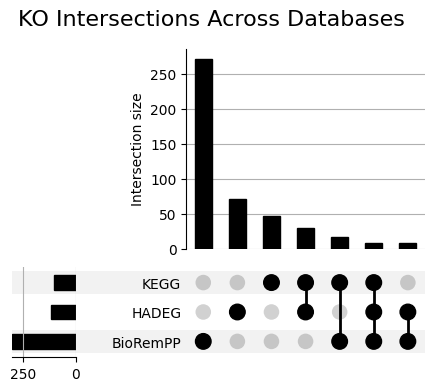

In [14]:
# ==============================================================================
# PART 2: PLOTTING THE UPSET PLOT
# ==============================================================================

# ------------------------------------------------------------------------------
# 1. SETUP: Import Plotting Libraries
# ------------------------------------------------------------------------------
# Import the necessary functions/classes for plotting.
from upsetplot import from_contents, UpSet
import matplotlib.pyplot as plt

# ------------------------------------------------------------------------------
# 2. DATA PREPARATION & PLOTTING
# ------------------------------------------------------------------------------
# Use a try-except block to ensure the 'ko_sets' variable exists before plotting.
try:
    # Convert the dictionary of sets into a format suitable for the UpSet plot.
    upset_data = from_contents(ko_sets)

    # Create the plot.
    print("\nGenerating UpSet plot...")
    plt.figure(figsize=(10, 6)) # Set the figure size for better readability.

    # Initialize the UpSet plot object with the prepared data.
    # 'sort_by='cardinality'' sorts the intersection bars from largest to smallest.
    upset_plot = UpSet(upset_data, sort_by='cardinality')

    # Render the plot.
    upset_plot.plot()

    # Add a main title to the entire figure.
    plt.suptitle("KO Intersections Across Databases", fontsize=16)

    # Display the final plot.
    plt.show()

# ------------------------------------------------------------------------------
# 3. ERROR HANDLING
# ------------------------------------------------------------------------------
except NameError:
    print("❌ ERROR: The 'ko_sets' variable was not found.")
    print("Please make sure you have run the data processing script (Part 1) first.")
except Exception as e:
    print(f"❌ An unexpected error occurred during plotting: {e}")

In [15]:
# ==============================================================================
# Heatmap of Unique KO Counts by Sample and Reference AG
# ==============================================================================

# ------------------------------------------------------------------------------
# 1. SETUP: Import Libraries
# ------------------------------------------------------------------------------
import pandas as pd
import plotly.express as px

# ------------------------------------------------------------------------------
# 2. DATA LOADING AND PROCESSING
# ------------------------------------------------------------------------------
try:
    # Define the path to the BioRemPP results file.
    file_path = '/content/outputs/results_tables/BioRemPP_Results.txt'

    # Load the data from the file using a semicolon separator.
    print(f"Loading data from '{file_path}'...")
    df = pd.read_csv(file_path, sep=';')

    # --- Calculate Unique KO Counts for each Sample-AG pair ---
    # Drop rows where any of the key columns are missing to ensure accurate counting.
    df.dropna(subset=['sample', 'referenceAG', 'ko'], inplace=True)

    # Group the data by both 'referenceAG' and 'sample', then count the number of unique 'ko' values.
    # This gives us the count of unique KOs for each specific intersection.
    ko_counts = df.groupby(['referenceAG', 'sample'])['ko'].nunique()

    # --- Create the Heatmap Matrix ---
    # The result of groupby is a Series with a multi-level index.
    # We use .unstack() to pivot the 'sample' index level into columns.
    # This transforms the data into a 2D matrix format required for a heatmap.
    heatmap_matrix = ko_counts.unstack(level='sample')

    # Replace any resulting NaN (Not a Number) values with 0.
    # NaN appears where a sample-AG combination had no KOs.
    heatmap_matrix.fillna(0, inplace=True)

    print("✅ Data processed successfully!")
    print(f"Heatmap matrix created with {heatmap_matrix.shape[0]} Reference AGs and {heatmap_matrix.shape[1]} Samples.")

# ------------------------------------------------------------------------------
# 3. VISUALIZATION: Generate the Heatmap
# ------------------------------------------------------------------------------
    if not heatmap_matrix.empty:
        print("\nGenerating heatmap...")
        # Create an interactive heatmap using Plotly Express.
        fig = px.imshow(
            heatmap_matrix,
            title='Unique KO Count by Sample and Reference AG',
            labels=dict(x="Sample", y="Reference AG", color="Unique KO Count"),
            text_auto=True, # Automatically display the count values inside the cells.
            color_continuous_scale='Cividis', # A colorblind-friendly and visually pleasant color scale.
            aspect="auto" # Adjust aspect ratio to fit the container.
        )

        # Update layout for better readability.
        fig.update_layout(
            xaxis_tickangle=-45, # Angle the x-axis labels to prevent overlap.
            height=800,
            width=1200,
            plot_bgcolor='white'
        )

        # Display the final plot.
        fig.show()
    else:
        print("⚠️ The resulting matrix is empty. Cannot generate heatmap. Please check your input file.")

# ------------------------------------------------------------------------------
# 4. ERROR HANDLING
# ------------------------------------------------------------------------------
except FileNotFoundError:
    print(f"❌ ERROR: File not found at '{file_path}'. Please verify the path.")
except KeyError as e:
    print(f"❌ ERROR: A required column was not found: {e}. Please check the file's column names.")
except Exception as e:
    print(f"❌ An unexpected error occurred: {e}")

Loading data from '/content/outputs/results_tables/BioRemPP_Results.txt'...
✅ Data processed successfully!
Heatmap matrix created with 9 Reference AGs and 9 Samples.

Generating heatmap...


In [16]:
# ==============================================================================
# 100% Stacked Bar Chart of Proportional KO Counts by Reference AG
# ==============================================================================

# ------------------------------------------------------------------------------
# 1. SETUP: Import Libraries
# ------------------------------------------------------------------------------
# Import the pandas library for data manipulation and analysis.
import pandas as pd
# Import the plotly.express library for creating interactive visualizations.
import plotly.express as px


# ------------------------------------------------------------------------------
# 2. DATA LOADING AND PROCESSING
# ------------------------------------------------------------------------------
try:
    # Define the path to the BioRemPP results file.
    file_path = '/content/outputs/results_tables/BioRemPP_Results.txt'

    # Load the data from the file using a semicolon separator.
    print(f"Loading data from '{file_path}'...")
    df = pd.read_csv(file_path, sep=';')

    # --- Calculate Unique KO Counts per Reference AG ---
    # Drop rows where 'ko' or 'referenceAG' is missing to ensure accurate counting.
    df.dropna(subset=['ko', 'referenceAG'], inplace=True)

    # Group the data by 'referenceAG' and then count the number of unique 'ko' values for each group.
    ko_counts_by_ag = df.groupby('referenceAG')['ko'].nunique().reset_index()

    # Rename columns for clarity, matching the format needed for the bar chart.
    ko_counts_by_ag.columns = ['referenceAG', 'unique_ko_count']

    # --- Prepare Data for Stacked Bar Chart ---
    # Add a new column named 'total' and assign the same string value to all rows.
    # This is a technique to group all data into a single bar on the x-axis.
    ko_counts_by_ag['total'] = 'Total Unique KOs'

    print("✅ Data processed successfully!")
    print(f"Found {len(ko_counts_by_ag)} unique Reference AGs.")

# ------------------------------------------------------------------------------
# 3. CHART CREATION: Generate the Bar Chart
# ------------------------------------------------------------------------------
    # Create a bar chart figure using plotly.express.
    fig = px.bar(
        ko_counts_by_ag,                     # The processed DataFrame.
        x='total',                           # Use the helper column for the x-axis.
        y='unique_ko_count',                 # The values to be stacked on the y-axis.
        color='referenceAG',                 # Assign a different color to each 'referenceAG'.
        title='Proportional Contribution of Each Reference AG to Total Unique KOs', # Chart title.
        labels={'unique_ko_count': 'Percentage of Unique KOs'}, # Custom label for the y-axis.
        text_auto='.2f',                     # Automatically add text labels, formatted to 2 decimal places.
        height=500                           # Set the height of the figure in pixels.
    )

# ------------------------------------------------------------------------------
# 4. LAYOUT CONFIGURATION: Customize the Chart's Appearance
# ------------------------------------------------------------------------------
    # Update the layout of the figure for a 100% stacked bar chart style.
    fig.update_layout(
        barmode='stack',                     # Ensure the bars are stacked on top of each other.
        barnorm='percent',                   # CRITICAL: Normalize the values in each bar to sum to 100%.
        xaxis_title=None,                    # Remove the title from the x-axis.
        xaxis=dict(showticklabels=False),    # Hide the tick labels on the x-axis.
        plot_bgcolor='white',                # Set the plot background to white for a clean look.
        yaxis=dict(gridcolor='lightgray'),   # Set the y-axis grid lines to a light gray color.
        legend_title_text='Reference AG'     # Add a title to the legend.
    )

# ------------------------------------------------------------------------------
# 5. TRACE ADJUSTMENT: Fine-tune Bar and Text Properties
# ------------------------------------------------------------------------------
    # Update the properties of the traces (the actual bars) in the figure.
    fig.update_traces(
        textangle=0,                         # Keep the text labels horizontal.
        textposition='inside',               # Position the text labels inside their bar segments.
        insidetextanchor='middle',           # Center the text labels within their segments.
        width=0.3                            # Set the width of the bar to make it thinner.
    )

# ------------------------------------------------------------------------------
# 6. DISPLAY: Show the Final Plot
# ------------------------------------------------------------------------------
    # Render and display the interactive figure.
    fig.show()

# ------------------------------------------------------------------------------
# 7. ERROR HANDLING
# ------------------------------------------------------------------------------
except FileNotFoundError:
    print(f"❌ ERROR: File not found at '{file_path}'. Please verify the path.")
except KeyError as e:
    print(f"❌ ERROR: A required column was not found: {e}. Please check the file's column names.")
except Exception as e:
    print(f"❌ An unexpected error occurred: {e}")

Loading data from '/content/outputs/results_tables/BioRemPP_Results.txt'...
✅ Data processed successfully!
Found 9 unique Reference AGs.
